<a href="https://colab.research.google.com/github/sophtsai/Heart-Disease-ML/blob/main/Modeling/ryanMLModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from collections import Counter
from sklearn.model_selection import train_test_split

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
key_ind = pd.read_csv('/content/drive/MyDrive/heart_2020_cleaned.csv')
key_ind

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [ ]:
key_ind.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [ ]:
print(sorted(Counter(key_ind['HeartDisease']).items()))

[('No', 292422), ('Yes', 27373)]


In [ ]:
has_hd = key_ind[key_ind['HeartDisease'] == 'Yes']
has_nohd = key_ind[key_ind['HeartDisease'] == 'No']
#has_hd makes a table containing only those with heart disease, and has_nohd makes table with people without heart disease

In [ ]:
print(has_hd.shape, has_nohd.shape, key_ind.shape)
#checking that they add up

(27373, 18) (292422, 18) (319795, 18)


In [ ]:
df_encoded = key_ind.copy()

In [ ]:
# Encode categorical columns with 2 values (e.g. Yes/No)

le = preprocessing.LabelEncoder()
encoding_lst = []
binary_cols = [col for col in df_encoded.columns if df_encoded[col].dtype not in [int, float]
               and df_encoded[col].nunique() == 2]

for col in binary_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])
    le_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    encoding_lst.append([col, le_mapping])

# Printing the encoding mapping for reference
for row in encoding_lst:
    print(*row)
    
df_encoded.head()

HeartDisease {'No': 0, 'Yes': 1}
Smoking {'No': 0, 'Yes': 1}
AlcoholDrinking {'No': 0, 'Yes': 1}
Stroke {'No': 0, 'Yes': 1}
DiffWalking {'No': 0, 'Yes': 1}
Sex {'Female': 0, 'Male': 1}
PhysicalActivity {'No': 0, 'Yes': 1}
Asthma {'No': 0, 'Yes': 1}
KidneyDisease {'No': 0, 'Yes': 1}
SkinCancer {'No': 0, 'Yes': 1}


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,Yes,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,No,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,Yes,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,No,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,No,1,Very good,8.0,0,0,0


In [ ]:
# Encoding categorical columns with more than 2 values

ageCategory = {'18-24':0, '25-29':1, '30-34':2, '35-39':3, '40-44':4, '45-49':5, '50-54':6, '55-59':7, '60-64':8,
             '65-69':9, '70-74':10, '75-79':11, '80 or older':12}
df_encoded['AgeCategory'] = df_encoded['AgeCategory'].replace(ageCategory)

race = {'American Indian/Alaskan Native': 0, 'Asian': 1, 'Black': 2, 'Hispanic': 3, 'White': 4, 'Other': 5}
df_encoded['Race'] = df_encoded['Race'].replace(race)

diabetic = {'No':0, 'No, borderline diabetes':1, 'Yes (during pregnancy)':2, 'Yes':3}
df_encoded['Diabetic'] = df_encoded['Diabetic'].replace(diabetic)

genHealth = {'Poor':0, 'Fair':1, 'Good':2, 'Very good':3, 'Excellent':4}
df_encoded['GenHealth'] = df_encoded['GenHealth'].replace(genHealth)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,4,3,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,4,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,4,3,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,4,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,4,0,1,3,8.0,0,0,0


In [ ]:
key_ind = df_encoded.copy()

In [ ]:
X = key_ind.drop('HeartDisease', axis = 1)
Y = key_ind['HeartDisease']

In [ ]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn import under_sampling, over_sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
randomos = RandomOverSampler(sampling_strategy= 'minority')
oversampledX, oversampledY = randomos.fit_resample(X,Y)
oversampledX.insert(0, 'HeartDisease', oversampledY)
print(oversampledX.shape, oversampledY.shape)
#I think oversampledX is the new dataset with all of it being oversampled

(584844, 18) (584844,)


In [ ]:
oversampledY

0         0
1         0
2         0
3         0
4         0
         ..
584839    1
584840    1
584841    1
584842    1
584843    1
Name: HeartDisease, Length: 584844, dtype: int64

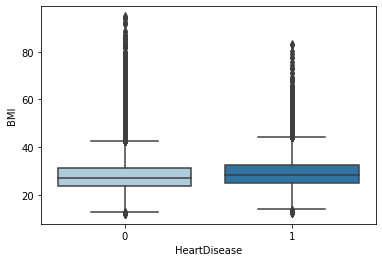

In [ ]:
sns.set_palette("Paired")
ax = sns.boxplot(x="HeartDisease", y = "BMI", data=key_ind) #from the original dataset 
plt.show()

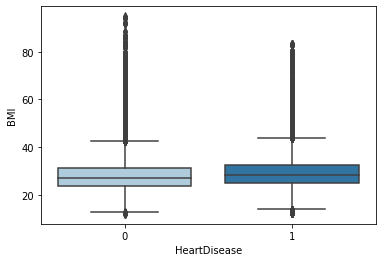

In [ ]:
sns.set_palette("Paired")
ax = sns.boxplot(x="HeartDisease", y = "BMI", data=oversampledX) #from the oversampled dataset
plt.show()

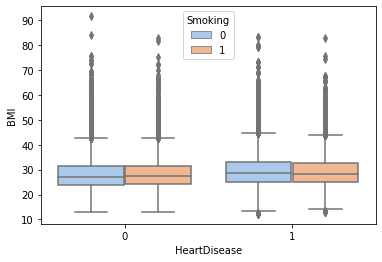

In [ ]:
random_subset_from_oversample = oversampledX.sample(n=100000)
sns.set_palette("pastel")
ax = sns.boxplot(x="HeartDisease", y = "BMI", hue = "Smoking", data=random_subset_from_oversample)
plt.show()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(oversampledX.drop('HeartDisease', axis = 1), oversampledY, test_size=0.2, random_state =  42)
print(f"No. of training examples: {X_train.shape[0]}")
print(f"No. of testing examples: {X_test.shape[0]}")
print(f"No. of training examples: {Y_train.shape[0]}")
print(f"No. of training examples: {Y_test.shape[0]}")

No. of training examples: 467875
No. of testing examples: 116969
No. of training examples: 467875
No. of training examples: 116969


In [ ]:
oversampledX.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,584844.0,584844.000000,584844.000000,584844.000000,584844.000000,584844.000000,584844.000000,584844.000000,584844.000000,584844.000000,584844.000000,584844.000000,584844.000000,584844.000000,584844.000000,584844.000000,584844.000000,584844.000000
mean,0.5,28.800138,0.491273,0.056200,0.093671,5.350894,4.232689,0.240464,0.527366,7.746833,3.700984,0.688714,0.713758,2.220847,7.112464,0.155000,0.076969,0.133097
std,0.5,6.476632,0.499924,0.230307,0.291371,9.933780,8.534653,0.427366,0.499251,3.376828,0.858357,1.237260,0.452004,1.139480,1.601478,0.361905,0.266543,0.339680
min,0.0,12.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.0,24.390000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,0.5,27.710000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000,4.000000,0.000000,1.000000,2.000000,7.000000,0.000000,0.000000,0.000000
75%,1.0,32.080000,1.000000,0.000000,0.000000,5.000000,3.000000,0.000000,1.000000,10.000000,4.000000,0.000000,1.000000,3.000000,8.000000,0.000000,0.000000,0.000000
max,1.0,94.850000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,1.000000,12.000000,5.000000,3.000000,1.000000,4.000000,24.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


In [ ]:
def modelTrainer(models):
  for m in models:
    m.fit(X_train, Y_train)
    Y_pred = m.predict(X_test)
    print("Accuracy Score: ",accuracy_score(Y_test, Y_pred)," for ", m)
    print("Precision Score: ",precision_score(Y_test, Y_pred)," for ", m)
    print("Recall Score: ",recall_score(Y_test, Y_pred)," for ", m)
    print(confusion_matrix(Y_test, Y_pred))
    print()

In [ ]:
models = {GaussianNB(), RandomForestClassifier(), XGBClassifier(), LogisticRegression(solver = 'sag', max_iter = 1000)}

modelTrainer(models)

Accuracy Score:  0.7674084586514376  for  XGBClassifier()
Precision Score:  0.7473351257314566  for  XGBClassifier()
Recall Score:  0.8079816702003967  for  XGBClassifier()
[[42509 15976]
 [11230 47254]]

Accuracy Score:  0.76323641306671  for  LogisticRegression(max_iter=1000, solver='sag')
Precision Score:  0.7556969173531757  for  LogisticRegression(max_iter=1000, solver='sag')
Recall Score:  0.77797346282744  for  LogisticRegression(max_iter=1000, solver='sag')
[[43776 14709]
 [12985 45499]]

Accuracy Score:  0.9694705434773316  for  RandomForestClassifier()
Precision Score:  0.9429396486360043  for  RandomForestClassifier()
Recall Score:  0.9994186444155666  for  RandomForestClassifier()
[[54948  3537]
 [   34 58450]]

Accuracy Score:  0.7097521565543007  for  GaussianNB()
Precision Score:  0.7653471771576899  for  GaussianNB()
Recall Score:  0.604985979071199  for  GaussianNB()
[[47637 10848]
 [23102 35382]]



In [ ]:
models = {KNeighborsClassifier()}
modelTrainer(models)

Accuracy Score:  0.8985457685369628  for  KNeighborsClassifier()
Precision Score:  0.8336697444706893  for  KNeighborsClassifier()
Recall Score:  0.9957595239723686  for  KNeighborsClassifier()
[[46866 11619]
 [  248 58236]]

